In [3]:
##Notebook to average data & create plots of stratospheric wind (50 hPa)
##Kendra Herweck
##Created 6/1/2021

In [1]:
import netCDF4 as nc
import numpy as np
import datetime as dt  # Python standard library datetime  module
from netCDF4 import Dataset  # http://code.google.com/p/netcdf4-python/
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from astropy.table import Table
from astropy.io import ascii
from pandas import read_csv
from matplotlib.dates import DateFormatter
from pandas import DataFrame
from pandas import Grouper
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import xarray as xr
from glob import glob
from shapely.geometry.polygon import LinearRing
import h5py


# Climatological Average

In [8]:
file='Data/Wind-Data/10Deg/MERRA2_100.instM_3d_asm_Np.198001.SUB.nc'
ds = xr.open_mfdataset(file)
print(ds['lev'][1].values)

50.0


In [9]:
filename_list = glob('Data/Wind-Data/10Deg/*.nc')
combined_ds = xr.open_mfdataset(filename_list, concat_dim='time')

f = nc.Dataset('Climatological-WindSpeed_1980-2020_50hPa.nc', 'w')
f.createDimension('time', None)
f.createDimension('y', len(combined_ds['lat']))
f.createDimension('x', len(combined_ds['lon']))
f.createDimension('level',len(combined_ds['lev']))
lats = f.createVariable('lat', float, ('y', ), zlib=True)
lons = f.createVariable('lon', float, ('x', ), zlib=True)
levs = f.createVariable('lev',float, ('level', ), zlib= True)
wind = f.createVariable('U', float, ('level','y', 'x'), zlib=True, least_significant_digit=1, fill_value=0)
# create latitude and longitude 1D arrays
lat_out  = combined_ds.variables['lat']
#print(len(lat_out))
lon_out  = combined_ds.variables['lon']
#print(combined_ds['U'])
#print(combined_ds.variables['lev'])
data = []
#for k in range (0,2):
for i in range (0, len(lat_out)):
    for j in range(0,len(lon_out)):
        mean = np.nanmean(combined_ds['U'][:,1,i,j].values)
        data.append(mean)
data_out = np.array(data)      ##1d array of data
data_out.shape = (len(lat_out),len(lon_out))     ##reshape to 3d array                 
wind[:] = data_out
lats[:] = lat_out
lons[:] = lon_out
# close file to write on disk
f.close()

# Difference Plots

### Low SIC - Climatology

#### November

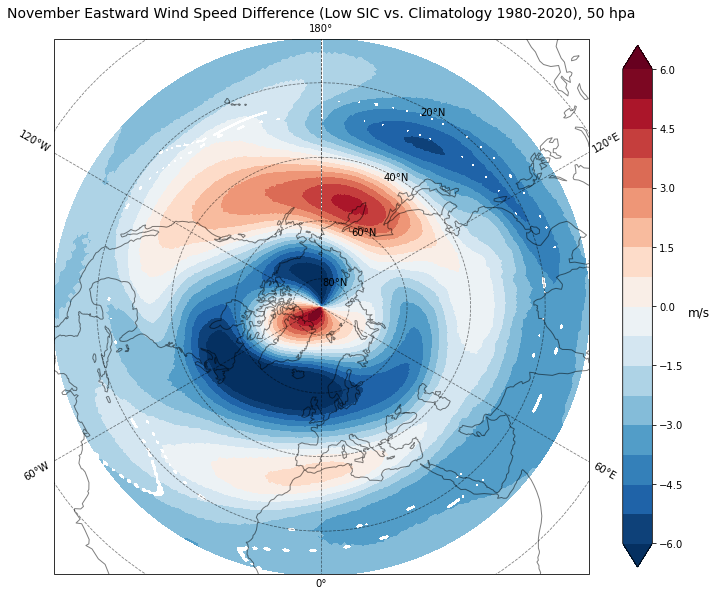

In [59]:
file1 = 'LowSICYears-November_WindSpeed-10deg_detrended-data_50hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_50hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic 
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   ##low - high


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-6, 6, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('November Eastward Wind Speed Difference (Low SIC vs. Climatology 1980-2020), 50 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

#### December

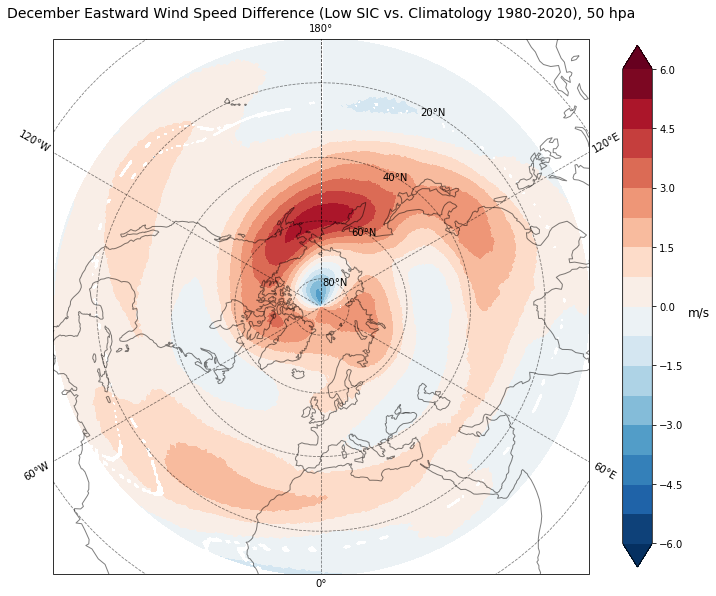

In [58]:
file1 = 'LowSICYears-December_WindSpeed-10deg_detrended-data_50hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_50hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-6, 6, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('December Eastward Wind Speed Difference (Low SIC vs. Climatology 1980-2020), 50 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

#### January

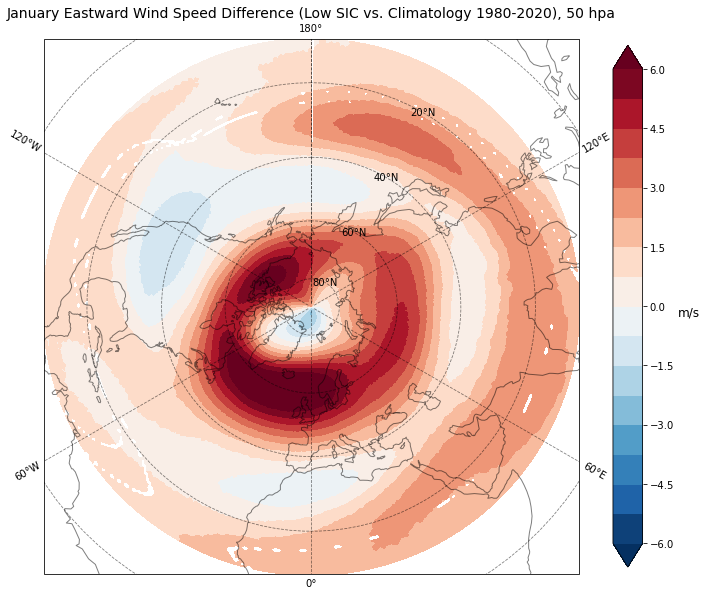

In [57]:
file1 = 'LowSICYears-January_WindSpeed-10deg_detrended-data_50hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_50hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-6, 6, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('January Eastward Wind Speed Difference (Low SIC vs. Climatology 1980-2020), 50 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

#### February

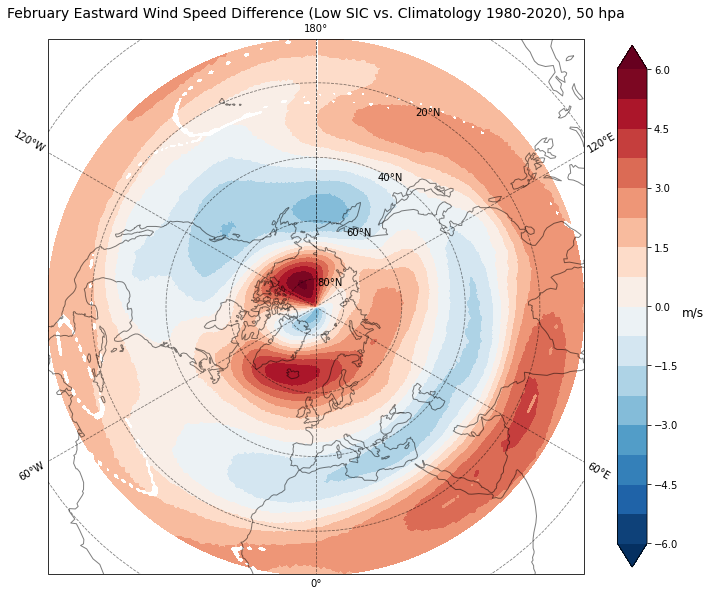

In [70]:
file1 = 'LowSICYears-February_WindSpeed-10deg_detrended-data_50hPa-1.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_50hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-6, 6, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('February Eastward Wind Speed Difference (Low SIC vs. Climatology 1980-2020), 50 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## El Nino - Climatology

#### November

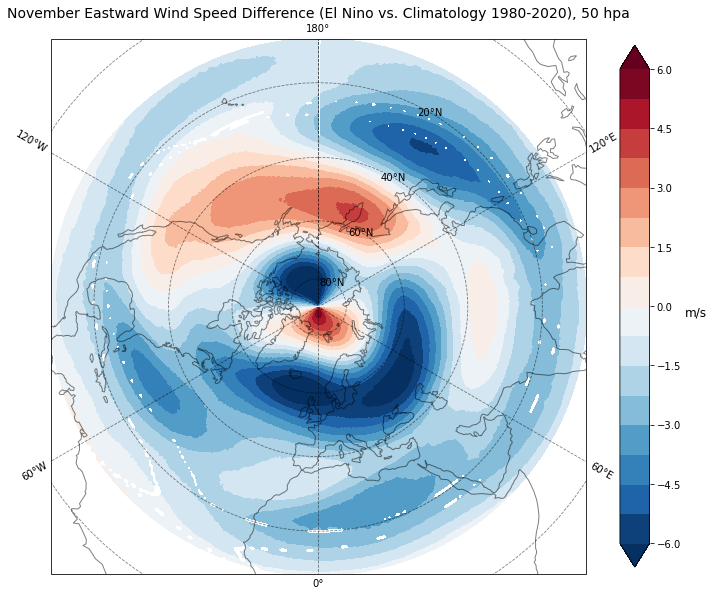

In [55]:
file1 = 'ElNinoYears-November_WindSpeed-10deg_detrended-data_50hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_50hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-6, 6, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('November Eastward Wind Speed Difference (El Nino vs. Climatology 1980-2020), 50 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

#### December

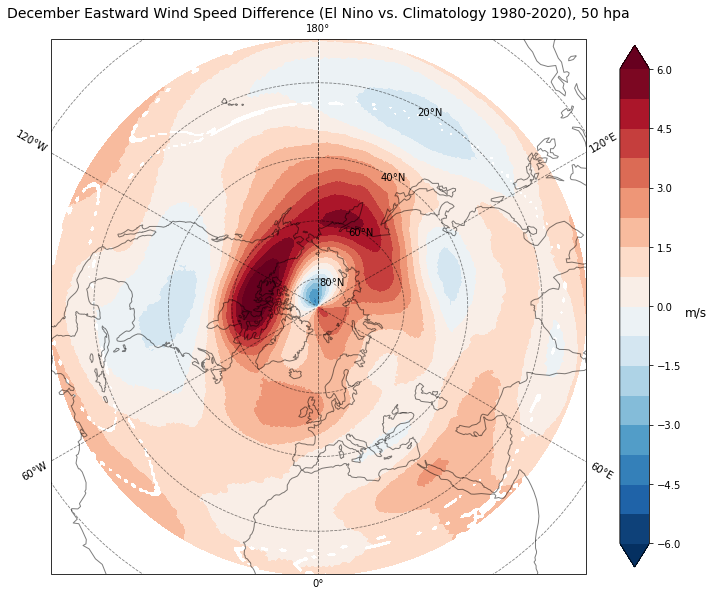

In [54]:
file1 = 'ElNinoYears-December_WindSpeed-10deg_detrended-data_50hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_50hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-6, 6, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('December Eastward Wind Speed Difference (El Nino vs. Climatology 1980-2020), 50 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

#### January

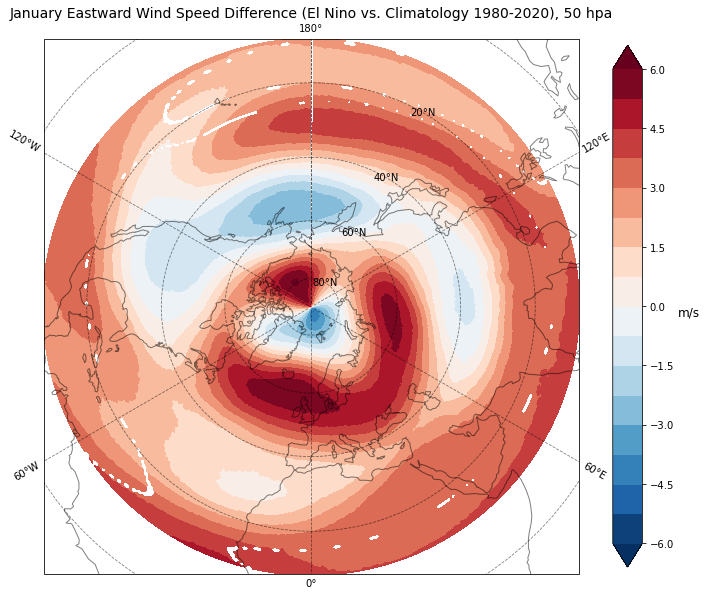

In [60]:
file1 = 'ElNinoYears-January_WindSpeed-10deg_detrended-data_50hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_50hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-6, 6, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('January Eastward Wind Speed Difference (El Nino vs. Climatology 1980-2020), 50 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

#### February

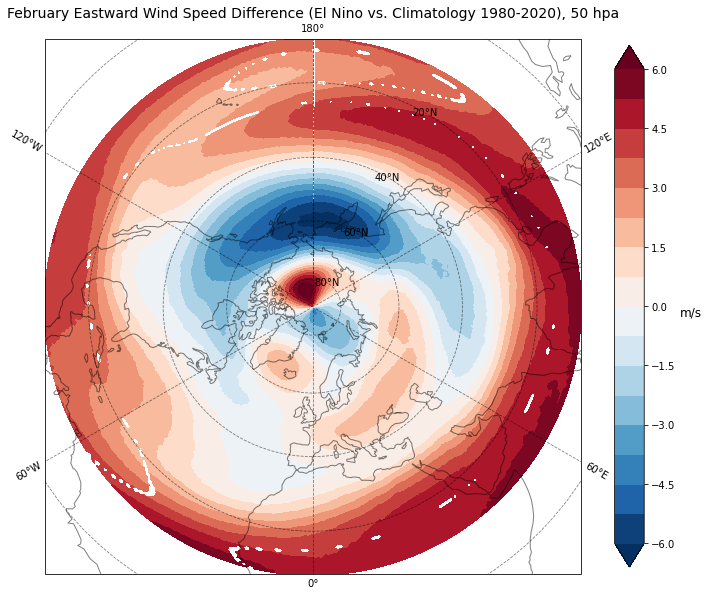

In [64]:
file1 = 'ElNinoYears-February_WindSpeed-10deg_detrended-data_50hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_50hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-6, 6, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('February Eastward Wind Speed Difference (El Nino vs. Climatology 1980-2020), 50 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

## El Nino & Low SIC - Climatology

#### November

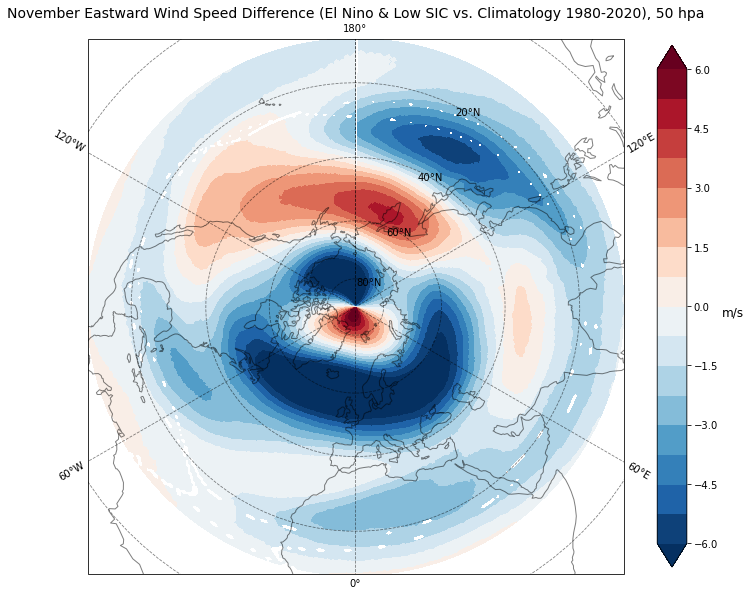

In [65]:
file1 = 'ElNinoLowSICYears-November_WindSpeed-10deg_detrended-data_50hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_50hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-6, 6, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('November Eastward Wind Speed Difference (El Nino & Low SIC vs. Climatology 1980-2020), 50 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

#### December

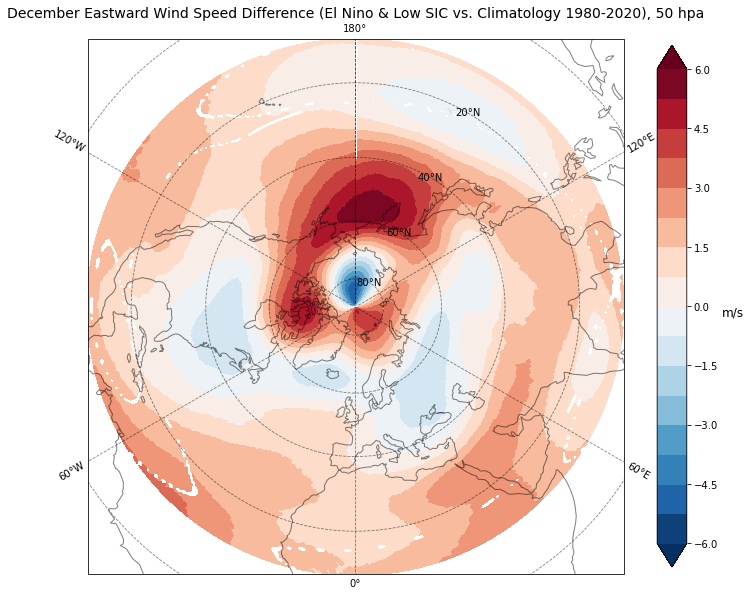

In [66]:
file1 = 'ElNinoLowSICYears-December_WindSpeed-10deg_detrended-data_50hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_50hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic & el nino years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-6, 6, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('December Eastward Wind Speed Difference (El Nino & Low SIC vs. Climatology 1980-2020), 50 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

#### January

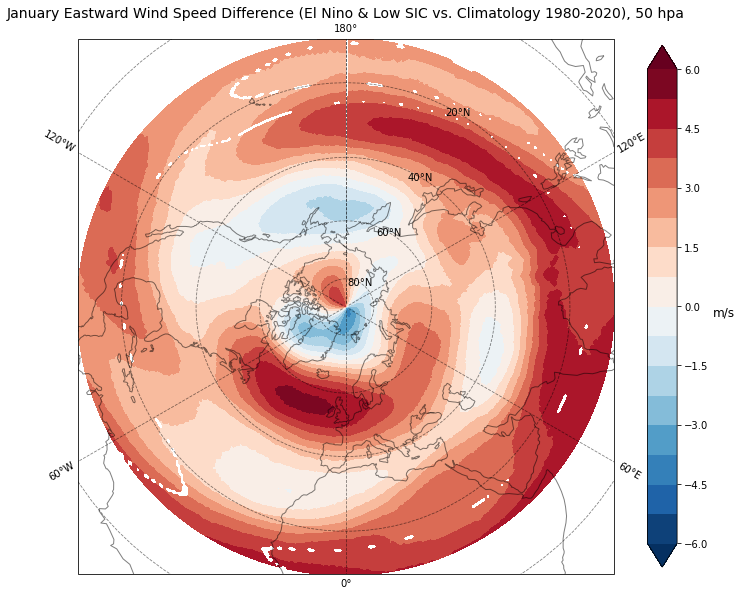

In [67]:
file1 = 'ElNinoLowSICYears-January_WindSpeed-10deg_detrended-data_50hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_50hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-6, 6, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('January Eastward Wind Speed Difference (El Nino & Low SIC vs. Climatology 1980-2020), 50 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)

#### February

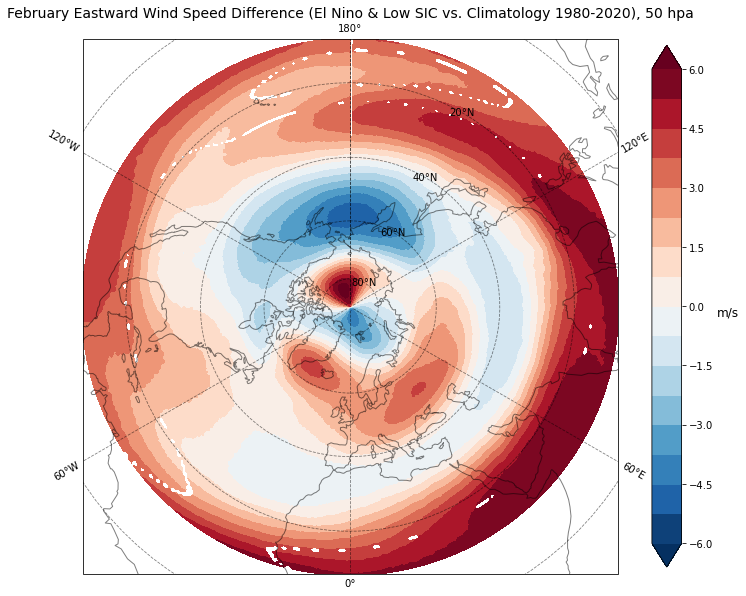

In [68]:
file1 = 'ElNinoLowSICYears-February_WindSpeed-10deg_detrended-data_50hPa.nc'
ds1 = xr.open_mfdataset(file1)               
file2 = 'Climatological-WindSpeed_1980-2020_50hPa.nc' 
ds2 = xr.open_mfdataset(file2) 

lat = ds1.variables['lat']
lon = ds1.variables['lon']

wind1=ds1['U'][:,:]  ## low sic years
wind2=ds2['U'][0,:,:]  ## climatology
wind = wind1-wind2   


fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.NorthPolarStereo(true_scale_latitude=90))
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1,alpha=0.5)
ax.gridlines(linestyle='--',color='black',draw_labels=True,alpha=0.5)
ax.set_extent([-179,179,10,90],ccrs.PlateCarree())
lons,lats= np.meshgrid(lon,lat)
levels = np.linspace(-6, 6, 17)
plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),levels=levels,cmap='RdBu_r',extend='both')
#plt.contourf(lons, lats, wind, transform=ccrs.PlateCarree(),cmap='RdBu_r')
plt.title('February Eastward Wind Speed Difference (El Nino & Low SIC vs. Climatology 1980-2020), 50 hpa', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.05, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
#plt.contour(lons,lats,climwind,levels=1,transform=ccrs.PlateCarree(),colors='black')
#fig.savefig('Plots/WindSpeedDifference_Neutral-ElNino-700hpa_1980-1999.png',facecolor='white',dpi=200)